# Analytic View

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
lsStage()

com.mycompany.airlineapp.etl
com.mycompany.airlineapp.datamodel
com.mycompany.airlineapp.feature
com.mycompany.airlineapp.app


In [18]:
ls("com.mycompany.airlineapp.etl")

(O) etl.dimtable.DimCustomer
(O) etl.dimtable.DimFlightLeg
(O) etl.dimtable.DimGeo
(O) etl.dimtable.DimMember
(O) etl.facttable.FactBooking
(O) etl.facttable.FactCheckIn
(O) etl.facttable.FactTicket
(I) etl.inputset.BookingTable
(I) etl.inputset.CheckInTable
(I) etl.inputset.CustomerTable
(I) etl.inputset.FlightLegTable
(I) etl.inputset.GeoRef
(I) etl.inputset.MemberTable
(I) etl.inputset.TicketTable


### Run the features

In [1]:
cm_all_feat = pdf("com.mycompany.airlineapp.feature.cmallfeat.CustomerAllFeatureTreat")

### General Distribution

In [3]:
cm_all_feat.smvEdd("cmcnt_seg_tvl_p1y", "cmcnt_lh_seg_tvl_p1y", "cmsum_rev_tvl_p1y", "cmint_age_now", "cmind_gender_f", "cmind_tier0_now")

cmind_gender_f       Non-Null Count         22
cmind_gender_f       Average                0.3181818181818182
cmind_gender_f       Standard Deviation     0.4767312946227962
cmind_gender_f       Min                    0.0
cmind_gender_f       Max                    1.0
cmcnt_seg_tvl_p1y    Non-Null Count         22
cmcnt_seg_tvl_p1y    Average                19.59090909090909
cmcnt_seg_tvl_p1y    Standard Deviation     67.36514507193442
cmcnt_seg_tvl_p1y    Min                    0.0
cmcnt_seg_tvl_p1y    Max                    317.0
cmcnt_lh_seg_tvl_p1y Non-Null Count         22
cmcnt_lh_seg_tvl_p1y Average                4.318181818181818
cmcnt_lh_seg_tvl_p1y Standard Deviation     18.714360067265797
cmcnt_lh_seg_tvl_p1y Min                    0.0
cmcnt_lh_seg_tvl_p1y Max                    88.0
cmsum_rev_tvl_p1y    Non-Null Count         22
cmsum_rev_tvl_p1y    Average                29313.40227439187
cmsum_rev_tvl_p1y    Standard Deviation     131362.66510444158
cmsum_rev_tvl_p1y    

Note that since we only have ~20 customers, we can run edd on the entire dataset. When facing a large number of records or columns, it is suggested to run on a sample discussed in the tutorial's Section I.

### Continuous Variables

Do binning on continuous variables and check distribution. Note again that since we only have a small population in the sample data, the variable may not seem to be "continuous".

In [12]:
cm_all_feat.smvBinHist(("cmcnt_seg_tvl_p1y", 10),("cmsum_rev_tvl_p1y", 50))

Histogram of cmcnt_seg_tvl_p1y: with BIN size 10.0
key                      count      Pct    cumCount   cumPct
0.0                         17   77.27%          17   77.27%
10.0                         3   13.64%          20   90.91%
50.0                         1    4.55%          21   95.45%
310.0                        1    4.55%          22  100.00%
-------------------------------------------------
Histogram of cmsum_rev_tvl_p1y: with BIN size 50.0
key                      count      Pct    cumCount   cumPct
0.0                         11   50.00%          11   50.00%
250.0                        1    4.55%          12   54.55%
300.0                        1    4.55%          13   59.09%
350.0                        1    4.55%          14   63.64%
400.0                        1    4.55%          15   68.18%
650.0                        1    4.55%          16   72.73%
1750.0                       1    4.55%          17   77.27%
1800.0                       1    4.55%          18   8

### Ordinal Variables Frequency

In [35]:
def _pfreqhist(df, *cols):
    pdf = df.toPandas()
    no_cols = len(cols)
    fig = plt.figure()
    num = 1

    for col in cols:
        fig.add_subplot(no_cols,1,num)
        s = pdf[col].value_counts()
        ax = s.plot(kind='bar', color='k', alpha=0.3)
        ax.set_xticklabels(s.index, fontsize=6)
        num += 1

DataFrame.pfreqhist = lambda df, *cols: _pfreqhist(df, *cols)

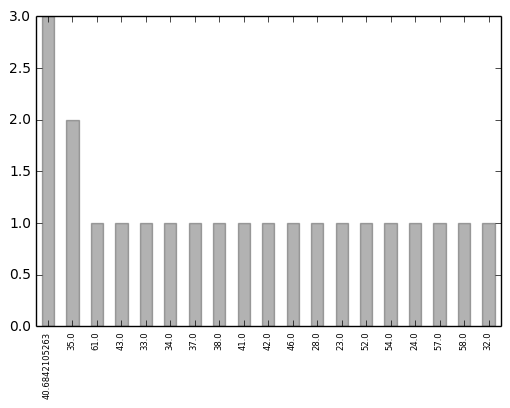

In [25]:
cm_all_feat.pfreqhist("cmint_age_now")

You can see that we have 3 customers with age 40.684..., which are the results of missing imputation. Users can also use **`cast(IntegerType)`** when calculating the group average to make sure the outputs are of integer type.

### Recoded Binary / Category Variables Cross-Check

As we have recoded some binary / categorical variables, it makes sense to do some cross-check to ensure the results are as expected

In [29]:
cm_all_feat.smvHist("cmstr_gender_cd", "cmstr_tier_now")

Histogram of cmstr_gender_cd: String sort by Key
key                      count      Pct    cumCount   cumPct
F                            7   31.82%           7   31.82%
M                           12   54.55%          19   86.36%
NA                           3   13.64%          22  100.00%
-------------------------------------------------
Histogram of cmstr_tier_now: String sort by Key
key                      count      Pct    cumCount   cumPct
0                           16   72.73%          16   72.73%
1                            3   13.64%          19   86.36%
2                            1    4.55%          20   90.91%
3                            1    4.55%          21   95.45%
5                            1    4.55%          22  100.00%
-------------------------------------------------


In [27]:
cm_all_feat.smvConcatHist(["cmind_gender_f", "cmind_gender_m"])

Histogram of cmind_gender_f_cmind_gender_m: String sort by Key
key                      count      Pct    cumCount   cumPct
0_0                          3   13.64%           3   13.64%
0_1                         12   54.55%          15   68.18%
1_0                          7   31.82%          22  100.00%
-------------------------------------------------


In [30]:
cm_all_feat.smvConcatHist(["cmind_tier0_now", "cmind_tier1_now", "cmind_tier2_now", "cmind_tier3_now"])

Histogram of cmind_tier0_now_cmind_tier1_now_cmind_tier2_now_cmind_tier3_now: String sort by Key
key                      count      Pct    cumCount   cumPct
0_0_0_0                      1    4.55%           1    4.55%
0_0_0_1                      1    4.55%           2    9.09%
0_0_1_0                      1    4.55%           3   13.64%
0_1_0_0                      3   13.64%           6   27.27%
1_0_0_0                     16   72.73%          22  100.00%
-------------------------------------------------
